<!-- # **logistic Regression** -->

# **Logistic Regression**

**Question. Use the Breast Cancer Wisconsin dataset from sklearn.datasets to perform binary classification using Logistic Regression. Your task is to:**

##### 1) Import the dataset and perform exploratory analysis.

##### 2) Split the data into training and test sets (80-20 split).

##### 3) Train a logistic regression model.

##### 4) Evaluate the model using accuracy, confusion matrix, and classification report.

##### 5) Write the complete Python code to accomplish this task.



In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay

In [20]:
bc = datasets.load_breast_cancer()

In [21]:
bv = bc.data

In [22]:
data = pd.DataFrame(bv, columns=bc.feature_names)

In [23]:
data['target'] = bc.target

In [24]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [25]:
X = data.drop(columns=['target'])

In [26]:
y = data['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, shuffle=False, test_size=0.2)

In [28]:
X_train.shape

(455, 30)

In [29]:
y_train.shape

(455,)

In [30]:
log = LogisticRegression(max_iter=10000)

In [31]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [32]:
log.score(X_test, y_test)

0.9298245614035088

In [33]:
y_pred_l = log.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred_l)

0.9298245614035088

In [37]:
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        26
           1       0.99      0.92      0.95        88

    accuracy                           0.93       114
   macro avg       0.88      0.94      0.91       114
weighted avg       0.94      0.93      0.93       114



In [40]:
mse_l = mean_squared_error(y_test,y_pred_l)
mse_l

0.07017543859649122

In [41]:
cm = confusion_matrix(y_test, y_pred_l)

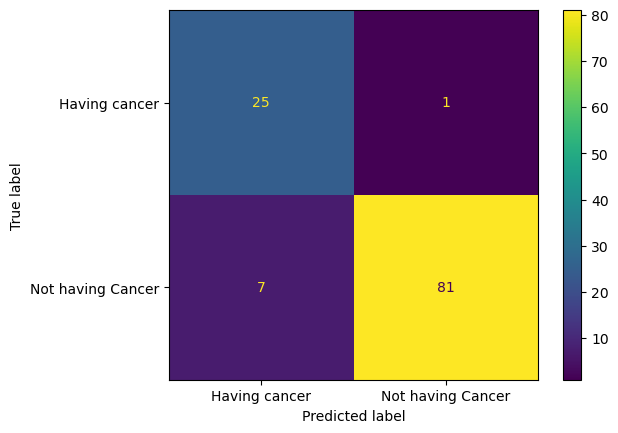

In [46]:
label = ['Having cancer', 'Not having Cancer']
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot()

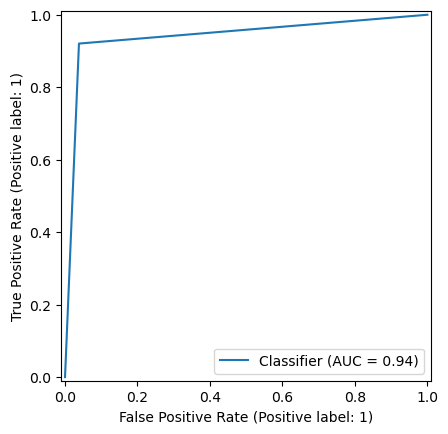

In [47]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_l)

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_l)

0.9409965034965035